In [30]:
from functional import seq
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

In [31]:
# TODO Сравнить с новым поршнем
# data {'list':
#      [{ 't': double,
#         'xs': [double, double, ...],
#         'ps': [double, double, ...],
#         'us': [double, double, ...]  },
#      ...,
#      ...  ]
#      }

In [45]:
import json
from copy import deepcopy

with open('testy_newnew.json', 'r') as f:
    data = json.load(f)
data = list(reversed(data[::70]))
len(data) 
trim1=0
trim2=1
for d in data:
    d['xs'] = d['xs'][trim1:-trim2]
    d['us'] = d['us'][trim1:-trim2]
    d['ps'] = d['ps'][trim1:-trim2]
data1 = deepcopy(data)
# 98066,5 кг/см3 -> Па

In [46]:
with open('testy_new_wpowers.json', 'r') as f:
    d2 = json.load(f)
len(d2)

34161

In [47]:
d2[0].keys()

dict_keys(['t', 'xs', 'ps', 'us'])

In [48]:
# smooth
from scipy.signal import savgol_filter

windowsize = 11
order = 3
for d1, d in zip(data1, data):
    d['us'] = savgol_filter(d1['us'], windowsize, order)
    d['ps'] = savgol_filter(d1['ps'], windowsize, order)
data_1d = data

In [49]:
def find_index(datas, head_x):
    xs = [d['xs'][-1] for d in datas]
    for i, x in enumerate(xs):
        if x > head_x:
            return i
    return len(xs)-1

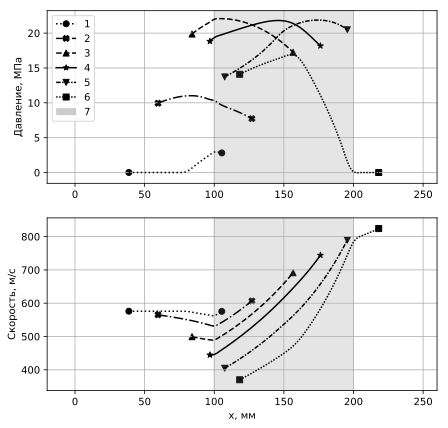

In [50]:
mpl.rcParams['figure.figsize'] = (7,7) 

shift = 0.00
v0 = data[0]['us'][0]
t_shift = shift/v0

styles = [(find_index(data, 0.105), ':', 'o'),
          (find_index(data, 0.125), '-.', 'X'), 
          (find_index(data, 0.155), '--', '^'),
          (find_index(data, 0.175), '-', '*'), 
          (find_index(data, 0.195), (0, (3, 1, 1, 1)), 'v'), 
          (find_index(data, 0.215), (0, (1, 1)), 's')]

plt.subplot(211)
plt.grid()
legend_elements = []
plt.axvspan(100, 200, alpha=0.2, color='gray') 
j = 1
for i, ls, ms in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['ps'])*10E-8
    plt.plot(x*1000, y, ls=ls, color='black')
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color='black',marker=ms)
    t = (d['t']-t_shift)*1000
    legend_elements.append(Line2D([0,1], [0,0], label=f'{j}', ls=ls, color='black', marker=ms))
    j += 1

legend_elements.append( Patch(facecolor='gray', alpha=0.4, label=f'{j}'))
                
    
plt.ylabel('Давление, МПа')
    
plt.legend(handles=legend_elements, loc='upper left' )

plt.xlim(-20,260)
plt.subplot(212)
plt.axvspan(100, 200, alpha=0.2, color='gray')
plt.grid()
for i, ls, ms in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['us'])
    plt.plot(x*1000, y, ls=ls, color='black')
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color='black',marker=ms)


plt.xlabel('x, мм')
plt.ylabel('Скорость, м/с')


plt.xlim(-20,260)

# plt.axvline(x=0.1, ls='-',color='black')
# plt.axvline(x=0.2, ls='-',color='black')

plt.savefig('Давление и скорости в поршне 2.png', dpi=300)
plt.show()

In [51]:
p_csv = seq.csv('ps.uhs')
ps_arrs = p_csv \
    .drop(3) \
    .map(lambda row: np.array([float(r) for r in row[1:]])) \
    .map(lambda arr: {'t': arr[0]*1e-3, 'ps': arr[1:]*1e3}) \
    .to_list()

In [52]:
u_csv = seq.csv('us.uhs')
us_arrs = u_csv \
    .drop(3) \
    .map(lambda row: np.array([float(r) for r in row[1:]])) \
    .map(lambda arr: {'t': arr[0]*1e-3, 'us': arr[1:]}) \
    .to_list()

In [53]:
xs0 = np.arange(0.042,0.1081,0.002)-0.01
xs_arrs = [{'t': 0, 'xs': xs0}]
for us in us_arrs:
    dt = us['t']- xs_arrs[-1]['t']
    next_xs = xs_arrs[-1]['xs'] + dt * us['us']
    xs_arrs.append({'t':us['t'], 'xs': next_xs})

xs_arrs = xs_arrs[1:]

In [54]:
data2 = []
for x, p ,u in zip(xs_arrs, ps_arrs, us_arrs):
    data2.append({'t': x['t'], 
                 'xs': x['xs'],
                 'ps': p['ps'],
                 'us': u['us']})

In [55]:
data = data2

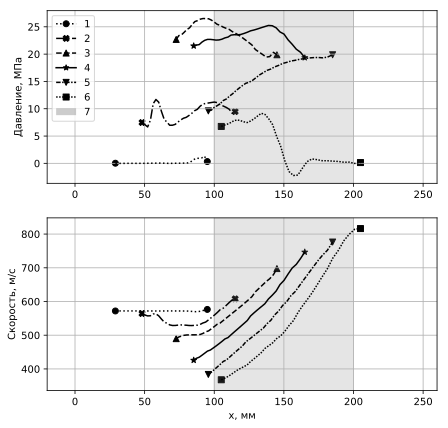

In [56]:
mpl.rcParams['figure.figsize'] = (7,7) 

shift = 0.01
v0 = data[0]['us'][0]
t_shift = shift/v0

styles = [(find_index(data, 0.105), ':', 'o'),
          (find_index(data, 0.125), '-.', 'X'), 
          (find_index(data, 0.155), '--', '^'),
          (find_index(data, 0.175), '-', '*'), 
          (find_index(data, 0.195), (0, (3, 1, 1, 1)), 'v'), 
          (find_index(data, 0.215), (0, (1, 1)), 's')]

plt.subplot(211)
plt.grid()
legend_elements = []
plt.axvspan(100, 200, alpha=0.2, color='gray') 
j = 1
for i, ls, ms in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['ps'])*10E-8
    plt.plot(x*1000, y, ls=ls, color='black')
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color='black',marker=ms)
    t = (d['t']-t_shift)*1000
    legend_elements.append(Line2D([0,1], [0,0], label=f'{j}', ls=ls, color='black', marker=ms))
    j += 1

legend_elements.append( Patch(facecolor='gray', alpha=0.4, label=f'{j}'))
                
    
plt.ylabel('Давление, МПа')
    
plt.legend(handles=legend_elements, loc='upper left' )

plt.xlim(-20,260)
plt.subplot(212)
plt.axvspan(100, 200, alpha=0.2, color='gray')
plt.grid()
for i, ls, ms in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['us'])
    plt.plot(x*1000, y, ls=ls, color='black')
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color='black',marker=ms)


plt.xlabel('x, мм')
plt.ylabel('Скорость, м/с')


plt.xlim(-20,260)

# plt.axvline(x=0.1, ls='-',color='black')
# plt.axvline(x=0.2, ls='-',color='black')

# plt.savefig('Давление и скорости в поршне 2.png', dpi=300)
plt.show()

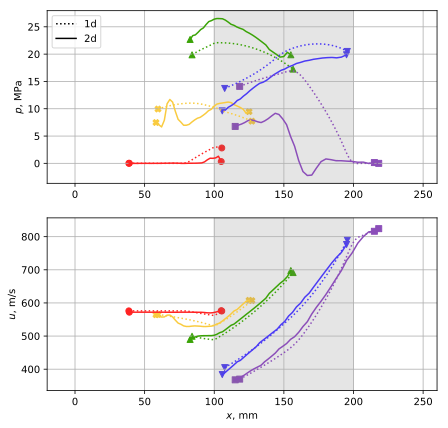

In [57]:
mpl.rcParams['figure.figsize'] = (7,7) 

shift = 0.00
v0 = data[0]['us'][0]
t_shift = -shift/v0

styles = [(find_index(data, 0.105), '-', 'o', '#FF2323'),
          (find_index(data, 0.125), '-', 'X', '#F9CB40'), 
          (find_index(data, 0.155), '-', '^', '#3AA306'),
#           (find_index(data, 0.175), '-', '*'), 
          (find_index(data, 0.195), '-', 'v', '#4A3AF5'), 
          (find_index(data, 0.215), '-', 's', '#8B4EB9')]

styles1d = [(find_index(data_1d, 0.105), ':', 'o', '#FF2323'),
          (find_index(data_1d, 0.125), ':', 'X', '#F9CB40'), 
          (find_index(data_1d, 0.155), ':', '^', '#3AA306'),
#           (find_index(data_1d, 0.175), '-', '*'), 
          (find_index(data_1d, 0.195), ':', 'v', '#4A3AF5'), 
          (find_index(data_1d, 0.215), ':', 's', '#8B4EB9')]

plt.subplot(211)
plt.grid()
legend_elements = []
plt.axvspan(100, 200, alpha=0.2, color='gray') 
j = 1
for i, ls, ms, col in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['ps'])*10E-8
    plt.plot(x*1000, y, ls=ls, color=col)
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color=col,marker=ms)
    t = (d['t']-t_shift)*1000
#     legend_elements.append(Line2D([0,1], [0,0], label=f'{j}', ls=ls, color=col, marker=ms))
    j += 1

for i, ls, ms, col in styles1d:
    d = data_1d[i]
    x = np.array(d['xs']) 
    y = np.array(d['ps'])*10E-8
    plt.plot(x*1000, y, ls=ls, color=col)
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color=col,marker=ms)
    t = (d['t'])*1000
    
#     plt.fill_between()
#     legend_elements.append(Line2D([0,1], [0,0], label=f'{j}', ls=ls, color=col, marker=ms))
    j += 1

# legend_elements.append( Patch(facecolor='gray', alpha=0.4, label=f'{j}'))
                

legend_elements.append(Line2D([0,1], [0,0], label=f'1d', ls=':', color='black'))
legend_elements.append(Line2D([0,1], [0,0], label=f'2d', ls='-', color='black'))

plt.ylabel('$p$, MPa')
    
plt.legend(handles=legend_elements, loc='upper left' )

plt.xlim(-20,260)
plt.subplot(212)
plt.axvspan(100, 200, alpha=0.2, color='gray')
plt.grid()
for i, ls, ms,col in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['us'])
    plt.plot(x*1000, y, ls=ls, color=col)
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color=col,marker=ms)
    
for i, ls, ms,col in styles1d:
    d = data_1d[i]
    x = np.array(d['xs'])
    y = np.array(d['us'])
    plt.plot(x*1000, y, ls=ls, color=col)
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color=col,marker=ms)


plt.xlabel('$x$, mm')
plt.ylabel('$u$, m/s')


plt.xlim(-20,260)

# plt.axvline(x=0.1, ls='-',color='black')
# plt.axvline(x=0.2, ls='-',color='black')

plt.savefig('Давление и скорости в поршне 1d2d новый материал парам.png', dpi=300)
plt.show()

In [239]:
data_1d[0]

{'t': 1.3513139828969412e-07,
 'xs': [0.027714968744151094,
  0.028367983057672273,
  0.02902099737119345,
  0.029674011684714625,
  0.030327025998235804,
  0.03098004031175698,
  0.031633054625278156,
  0.03228606893879933,
  0.03293908325232051,
  0.03359209756584169,
  0.03424511187936287,
  0.034898126192884044,
  0.03555114050640522,
  0.03620415481992639,
  0.036857169133447575,
  0.03751018344696875,
  0.03816319776048993,
  0.038816212074011106,
  0.03946922638753228,
  0.040122240701053455,
  0.040775255014574636,
  0.04142826932809582,
  0.04208128364161699,
  0.04273429795513817,
  0.04338731226865934,
  0.04404032658218052,
  0.0446933408957017,
  0.04534635520922288,
  0.045999369522744055,
  0.04665238383626523,
  0.047305398149786404,
  0.04795841246330758,
  0.04861142677682876,
  0.04926444109034994,
  0.04991745540387112,
  0.05057046971739229,
  0.051223484030913466,
  0.05187649834443465,
  0.05252951265795582,
  0.053182526971477004,
  0.05383554128499818,
  0.0544

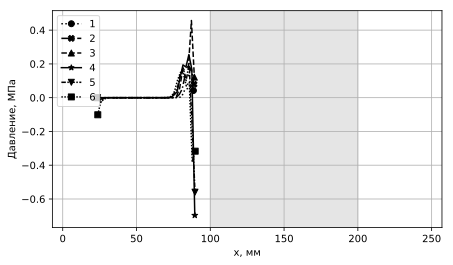

In [22]:
mpl.rcParams['figure.figsize'] = (7,4) 

shift = 0.01
v0 = data[0]['us'][0]
t_shift = shift/v0

styles = [(100, ':', 'o'),(170, '-.', 'X'), (210, '--', '^'),
                  (260, '-', '*'), (285, (0, (3, 1, 1, 1)), 'v'), (307, (0, (1, 1)), 's')]

plt.grid()
legend_elements = []
plt.axvspan(100, 200, alpha=0.2, color='gray') 
j = 1
for i, ls, ms in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['ps'])*1.3*10E-8
    plt.plot(x*1000, y, ls=ls, color='black')
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color='black',marker=ms)
    t = (d['t']-t_shift)*1000
    legend_elements.append(Line2D([0,1], [0,0], label=f'{j}', ls=ls, color='black', marker=ms))
    j += 1

# legend_elements.append( Patch(facecolor='gray', alpha=0.4, label=f'{j}'))
                
    
plt.ylabel('Давление, МПа')
    
plt.legend(handles=legend_elements, loc='upper left' )

plt.xlim(-7,257)
plt.xlabel('x, мм')


# plt.axvline(x=0.1, ls='-',color='black')
# plt.axvline(x=0.2, ls='-',color='black')

plt.savefig('Давление в поршне.png', dpi=300)
plt.show()

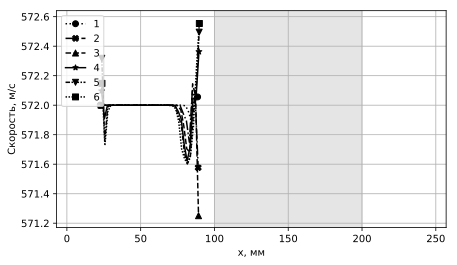

In [23]:
mpl.rcParams['figure.figsize'] = (7,4) 

shift = 0.01
v0 = data[0]['us'][0]
t_shift = shift/v0

styles = [(100, ':', 'o'),(170, '-.', 'X'), (210, '--', '^'),
                  (260, '-', '*'), (285, (0, (3, 1, 1, 1)), 'v'), (307, (0, (1, 1)), 's')]

plt.grid()
legend_elements = []
plt.axvspan(100, 200, alpha=0.2, color='gray') 
j = 1
for i, ls, ms in styles:
    d = data[i]
    x = np.array(d['xs']) - shift
    y = np.array(d['us'])
    plt.plot(x*1000, y, ls=ls, color='black')
    se = np.array([0,-1])
    plt.scatter(x[se]*1000, y[se],color='black',marker=ms)
    t = (d['t']-t_shift)*1000
    legend_elements.append(Line2D([0,1], [0,0], label=f'{j}', ls=ls, color='black', marker=ms))
    j += 1

# legend_elements.append( Patch(facecolor='gray', alpha=0.4, label=f'{j}'))
                
    
plt.ylabel('Скорость, м/с')
    
plt.legend(handles=legend_elements, loc='upper left' )

plt.xlim(-7,257)
plt.xlabel('x, мм')


# plt.axvline(x=0.1, ls='-',color='black')
# plt.axvline(x=0.2, ls='-',color='black')

plt.savefig('Скорость в поршне.png', dpi=300)
plt.show()